In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, \
classification_report, accuracy_score, confusion_matrix 

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 3, Finished, Available)

In [2]:


import pandas as pd
# Load data into pandas DataFrame from "/lakehouse/default/" + "Files/spacex_falcon9_launches.csv"
df = pd.read_csv("/lakehouse/default/" + "Files/spacex_falcon9_launches.csv")
df.head()


StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 4, Finished, Available)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
# Transform Outcome column to boolean success column
df['Success'] = df['Outcome'].map({'None None': 0, 'False Ocean': 0, 'True Ocean': 1, 'False ASDS': 0, 'None ASDS': 0, 'True RTLS': 1, 'True ASDS': 1, 'False RTLS': 0})
df.head()

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 5, Finished, Available)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Success
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,0


In [4]:
# Extract Success as target 
Y = df['Success'].to_numpy()
# Drop unnecessary columns
df.drop(columns=['Success','BoosterVersion', 'FlightNumber','Date','Flights','LandingPad','Block','ReusedCount','Longitude','Latitude','Class','Outcome'], inplace=True)
# Convert categorical columns to feature flags
df = pd.get_dummies(df, columns=['Orbit', 'LaunchSite', 'Serial', 'GridFins', 'Reused', 'Legs'])
df.head()


StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 6, Finished, Available)

,PayloadMass,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,6104.959412,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,525.000000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,677.000000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,500.000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,3170.000000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [5]:
# Normalize feature variables
transform = preprocessing.StandardScaler()
X = transform.fit_transform(df) 
print(X)

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 7, Finished, Available)

[[-1.94814463e-16 -1.05999788e-01 -1.05999788e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.19523159e+00 -1.05999788e-01 -1.05999788e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 [-1.16267307e+00 -1.05999788e-01 -1.05999788e-01 ... -8.35531692e-01
   1.93309133e+00 -1.93309133e+00]
 ...
 [ 1.99100483e+00 -1.05999788e-01 -1.05999788e-01 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [ 1.99100483e+00 -1.05999788e-01 -1.05999788e-01 ...  1.19684269e+00
  -5.17306132e-01  5.17306132e-01]
 [-5.19213966e-01 -1.05999788e-01 -1.05999788e-01 ... -8.35531692e-01
  -5.17306132e-01  5.17306132e-01]]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print("Indpendent Variables: ", X_train.shape)
print("Dependent Variable: ", Y_train.shape)

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 8, Finished, Available)

Indpendent Variables:  (72, 74)
Dependent Variable:  (72,)


In [7]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator = lr,  
                         param_grid = parameters,
                         cv = 10)

logreg_cv.fit(X_train, Y_train)

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 9, Finished, Available)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [8]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 10, Finished, Available)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8482142857142856


In [9]:
yhat=logreg_cv.predict(X_test)
print(classification_report(Y_test, yhat, digits=6))

StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 11, Finished, Available)

              precision    recall  f1-score   support

           0   1.000000  0.500000  0.666667         6
           1   0.800000  1.000000  0.888889        12

    accuracy                       0.833333        18
   macro avg   0.900000  0.750000  0.777778        18
weighted avg   0.866667  0.833333  0.814815        18



StatementMeta(, b7261aae-83c1-4636-97d2-f1d93510da8b, 12, Finished, Available)

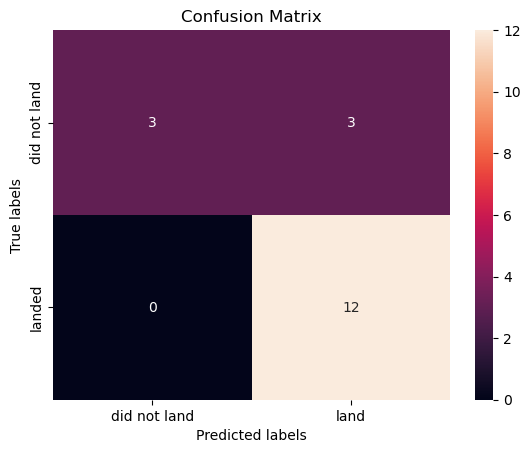

In [10]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 
    
plot_confusion_matrix(Y_test,yhat)